In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data=np.array(data)
m,n=data.shape
X_train = data[:, 1:].T  # Features (transpose for correct shape)
Y_train = data[:, 0]  

In [4]:
# Initialize Parameters
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.random.randn(10, 1) * 0.01
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.random.randn(10, 1) * 0.01
    return W1, b1, W2, b2


def ReLu(Z):
    return np.maximum(0, Z)

def deriv_ReLuZ(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# Forward Propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# One-hot Encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))  # Assuming 10 classes (0-9)
    one_hot_Y[np.arange(Y.size),Y] = 1
    return one_hot_Y.T

# Backward Propagation
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLuZ(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# Update Parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# Prediction & Accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Gradient Descent
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2

# Run Gradient Descent
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.001)



Iteration 0: Accuracy = 0.1250
Iteration 10: Accuracy = 0.3505
Iteration 20: Accuracy = 0.5245
Iteration 30: Accuracy = 0.6518
Iteration 40: Accuracy = 0.7203
Iteration 50: Accuracy = 0.7607
Iteration 60: Accuracy = 0.7851
Iteration 70: Accuracy = 0.8035
Iteration 80: Accuracy = 0.8162
Iteration 90: Accuracy = 0.8265
Iteration 100: Accuracy = 0.8307
Iteration 110: Accuracy = 0.8061
Iteration 120: Accuracy = 0.8394
Iteration 130: Accuracy = 0.8542
Iteration 140: Accuracy = 0.8597
Iteration 150: Accuracy = 0.8637
Iteration 160: Accuracy = 0.8674
Iteration 170: Accuracy = 0.8707
Iteration 180: Accuracy = 0.8734
Iteration 190: Accuracy = 0.8757
Iteration 200: Accuracy = 0.8781
Iteration 210: Accuracy = 0.8801
Iteration 220: Accuracy = 0.8816
Iteration 230: Accuracy = 0.8835
Iteration 240: Accuracy = 0.8848
Iteration 250: Accuracy = 0.8865
Iteration 260: Accuracy = 0.8878
Iteration 270: Accuracy = 0.8888
Iteration 280: Accuracy = 0.8899
Iteration 290: Accuracy = 0.8910
Iteration 300: Accura

In [10]:

data=pd.read_csv("mnist_test.csv")
data=np.array(data)
m,n=data.shape
X_test = data[:, 1:].T  # Features (transpose for correct shape)
print(X_test.shape)
Y_test = data[:, 0]  

(784, 10000)


In [6]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    return predictions
def test_prediction(index,W1,b1,W2,b2):
    current_image=X_test[:,index,None]
    prediction=make_predictions(X_test[:,index,None],W1,b1,W2,b2)
    label=Y_test[index]
    print("Prediction:",prediction)
    print("Label:",label)
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation="nearest")
    plt.show()

Prediction: [7]
Label: 7


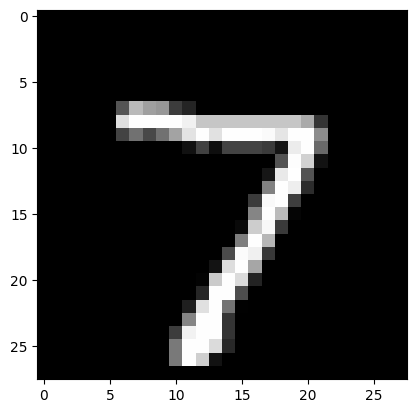

Prediction: [6]
Label: 6


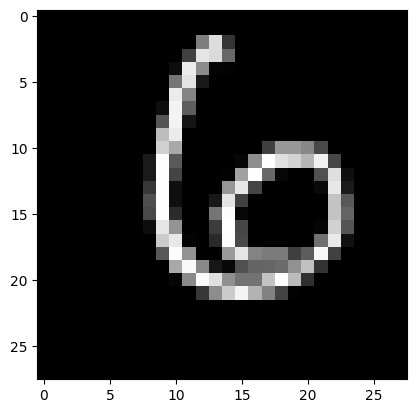

Prediction: [3]
Label: 3


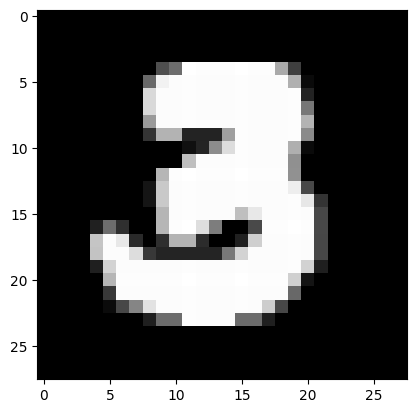

Prediction: [1]
Label: 4


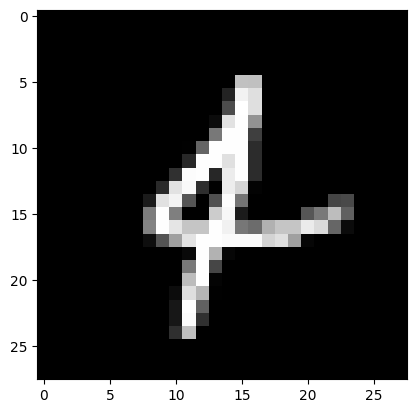

Prediction: [2]
Label: 2


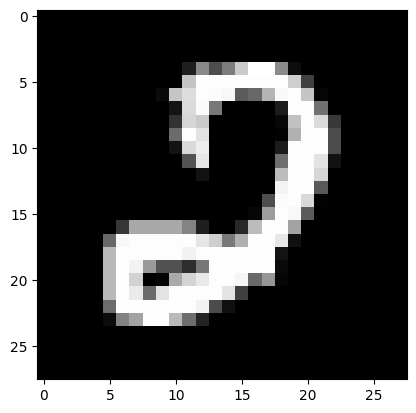

Prediction: [3]
Label: 3


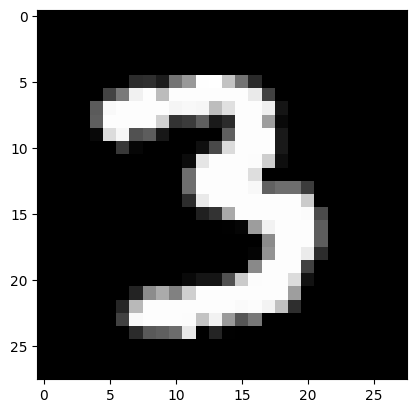

Prediction: [6]
Label: 6


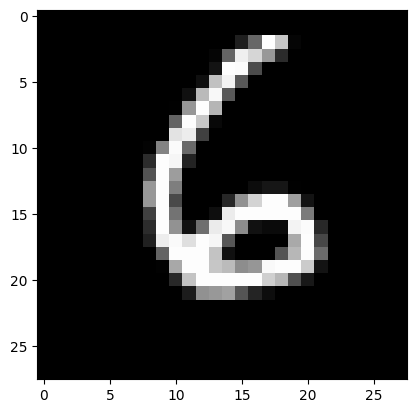

Prediction: [1]
Label: 1


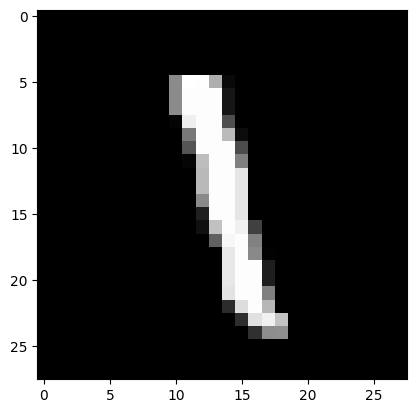

Prediction: [8]
Label: 8


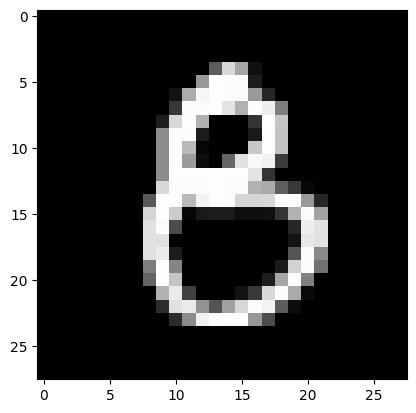

Prediction: [1]
Label: 1


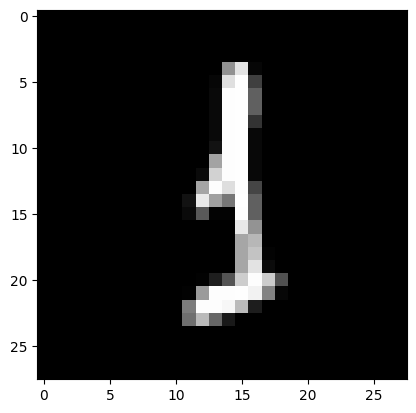

Prediction: [9]
Label: 9


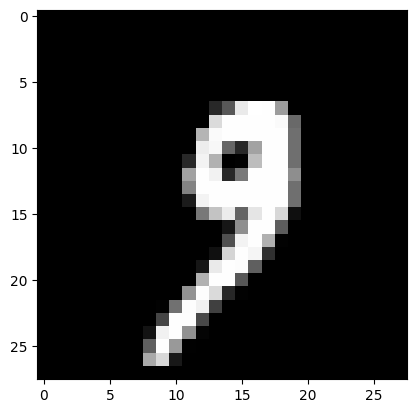

Prediction: [7]
Label: 7


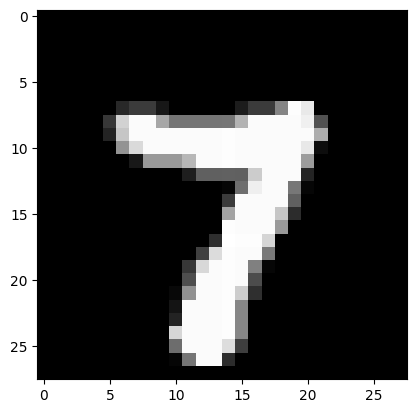

Prediction: [8]
Label: 8


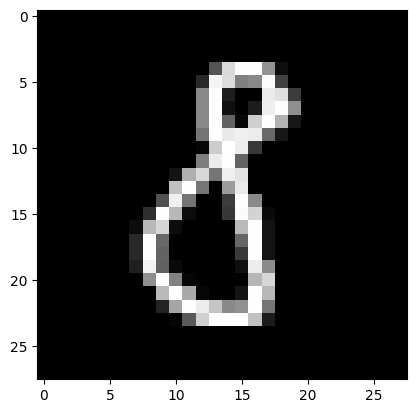

Prediction: [4]
Label: 4


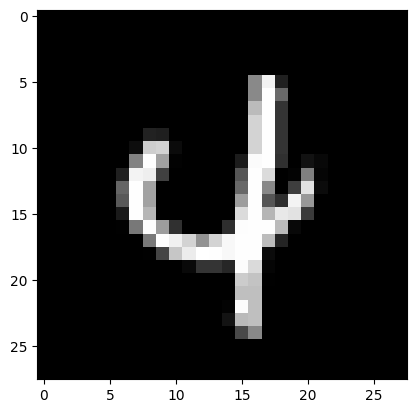

Prediction: [6]
Label: 6


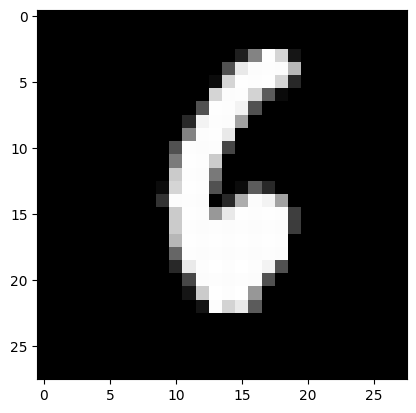

Prediction: [1]
Label: 7


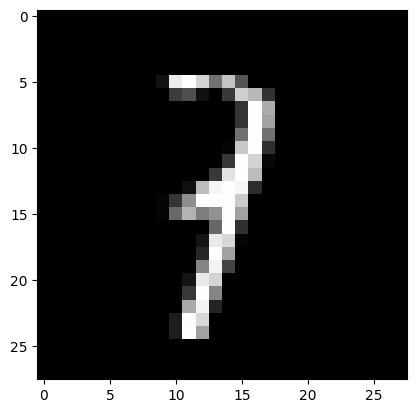

Prediction: [3]
Label: 3


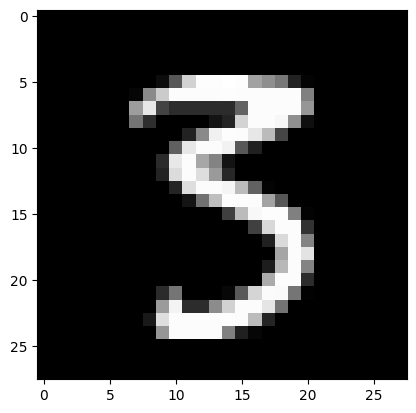

Prediction: [0]
Label: 0


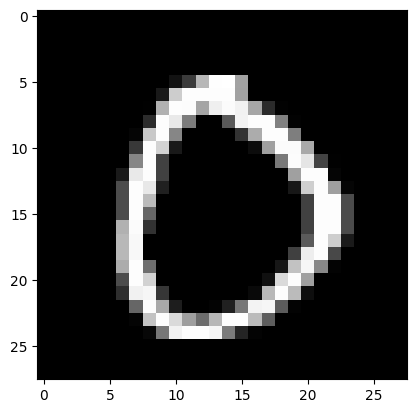

Prediction: [4]
Label: 6


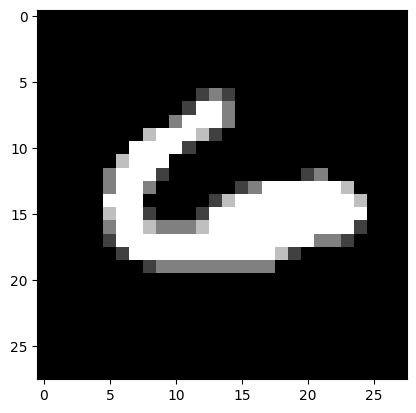

Prediction: [8]
Label: 1


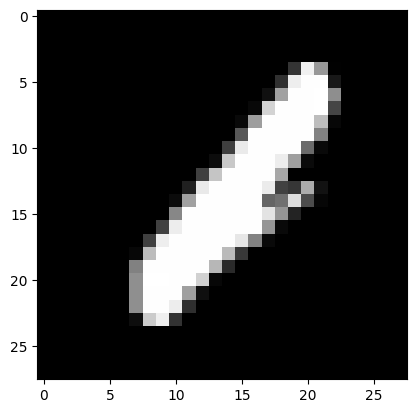

Prediction: [6]
Label: 6


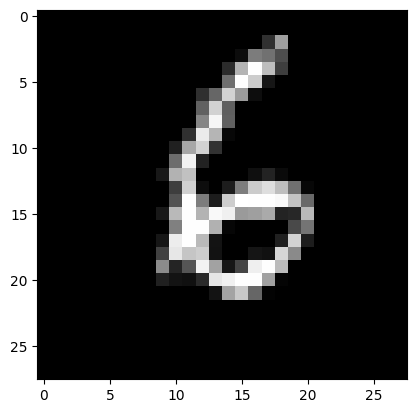

Prediction: [5]
Label: 5


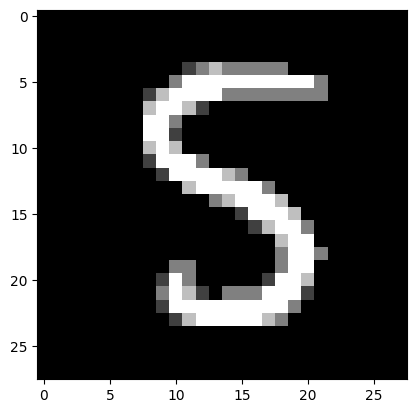

Prediction: [2]
Label: 2


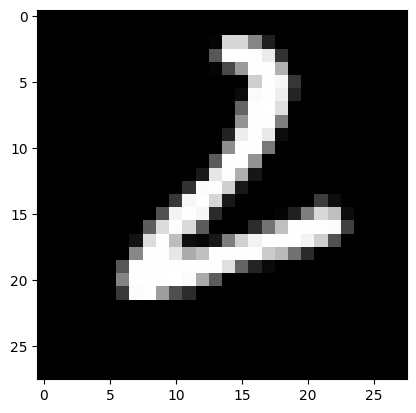

Prediction: [3]
Label: 3


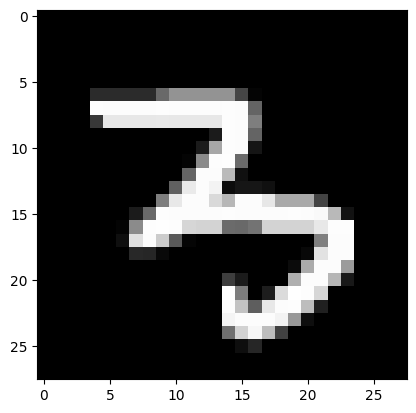

Prediction: [5]
Label: 5


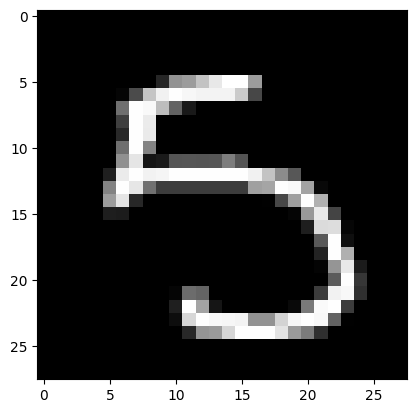

Prediction: [1]
Label: 2


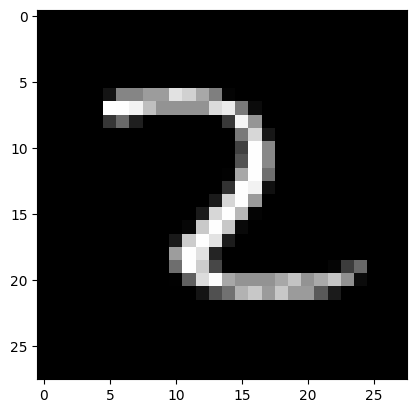

Prediction: [8]
Label: 8


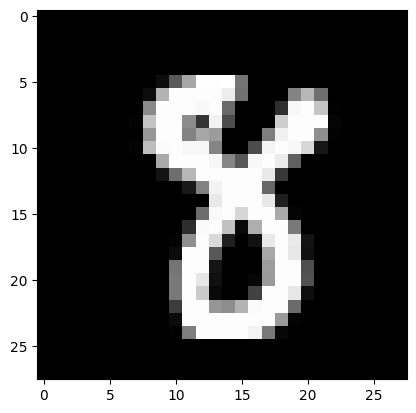

Prediction: [7]
Label: 7


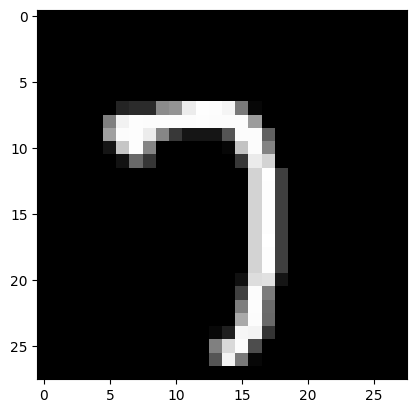

Prediction: [8]
Label: 8


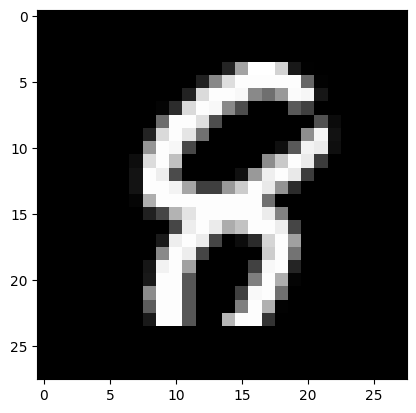

Prediction: [4]
Label: 4


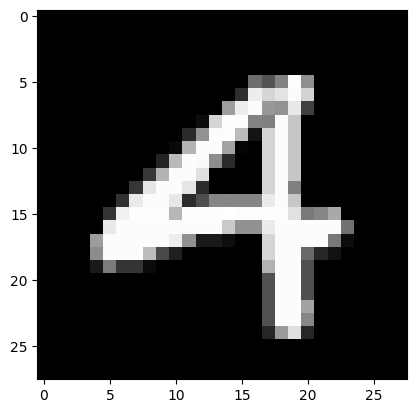

Prediction: [6]
Label: 6


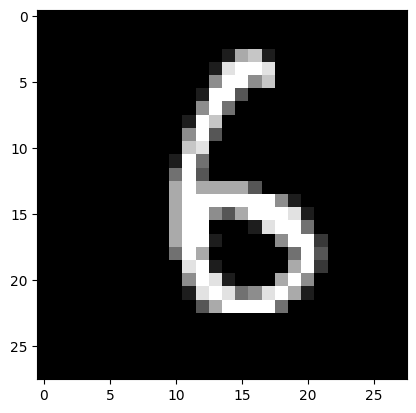

Prediction: [5]
Label: 5


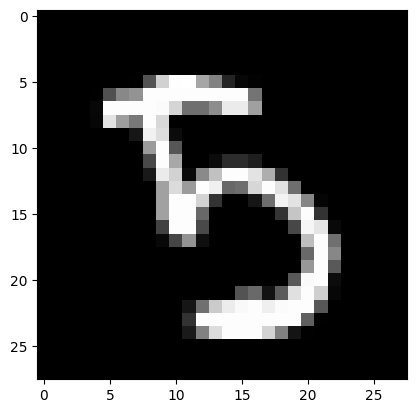

Prediction: [9]
Label: 9


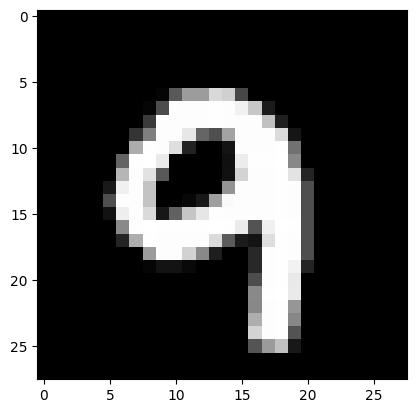

Prediction: [3]
Label: 3


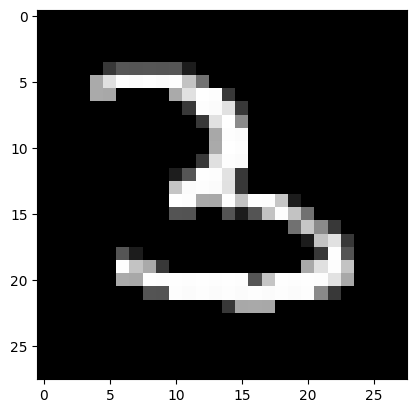

Prediction: [7]
Label: 7


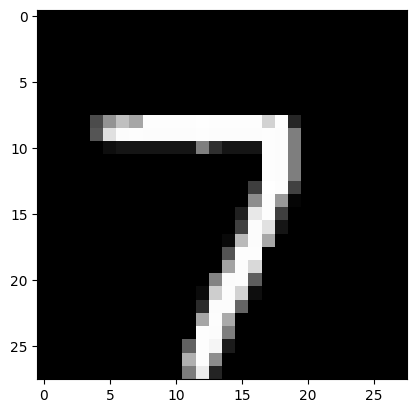

Prediction: [4]
Label: 4


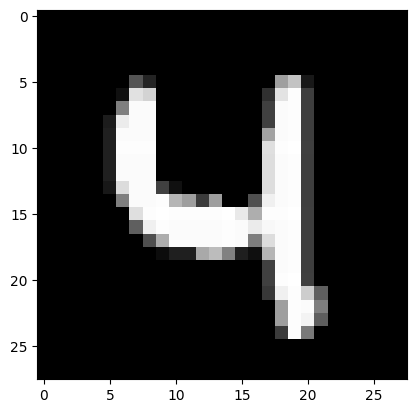

Prediction: [2]
Label: 2


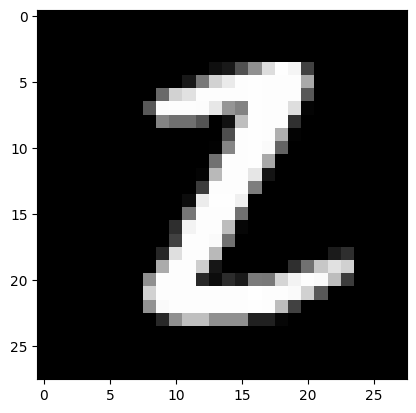

Prediction: [4]
Label: 4


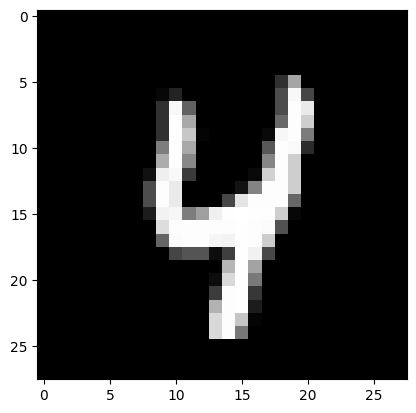

Prediction: [6]
Label: 6


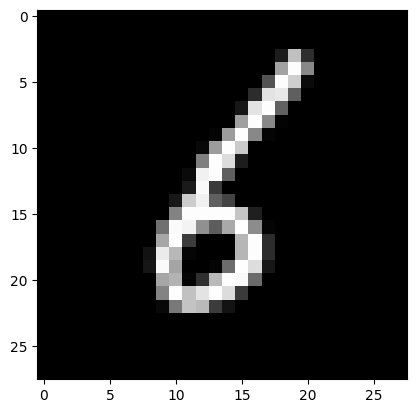

Prediction: [1]
Label: 1


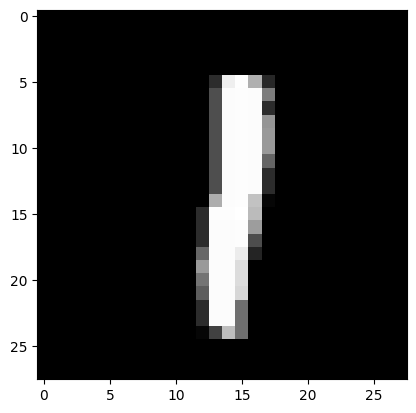

Prediction: [4]
Label: 9


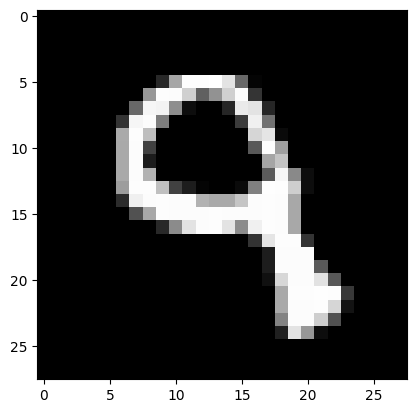

Prediction: [2]
Label: 2


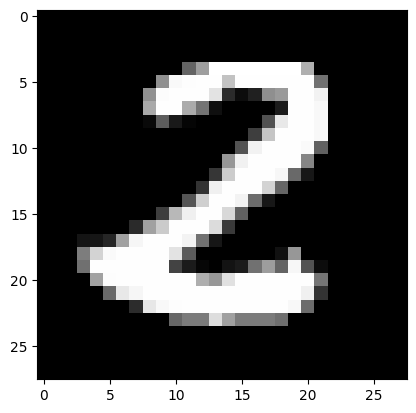

Prediction: [7]
Label: 7


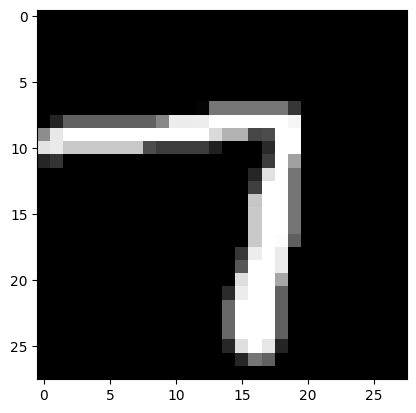

Prediction: [9]
Label: 5


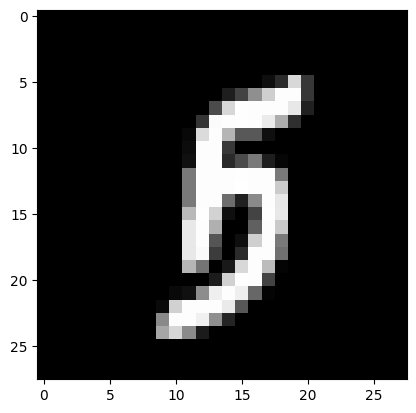

Prediction: [9]
Label: 7


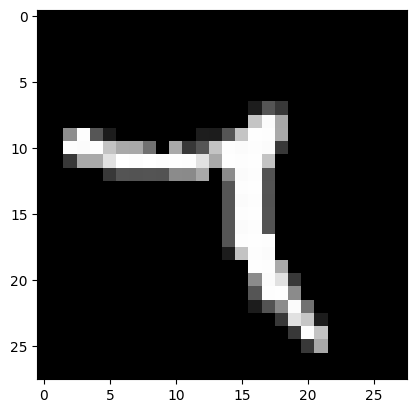

Prediction: [1]
Label: 9


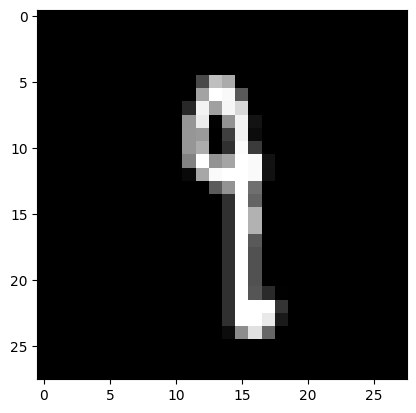

Prediction: [3]
Label: 3


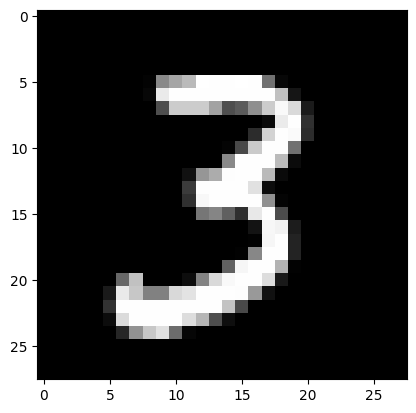

Prediction: [9]
Label: 9


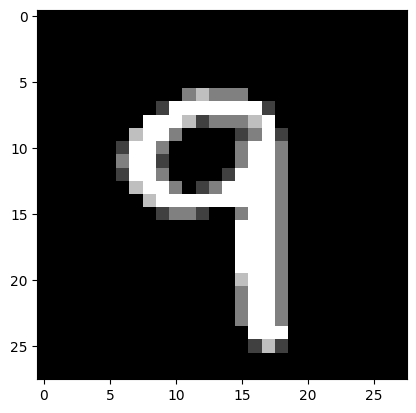

Prediction: [7]
Label: 7


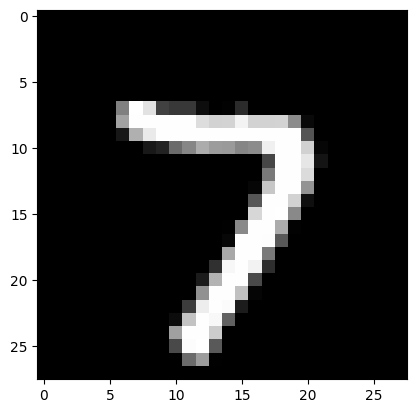

Prediction: [7]
Label: 7


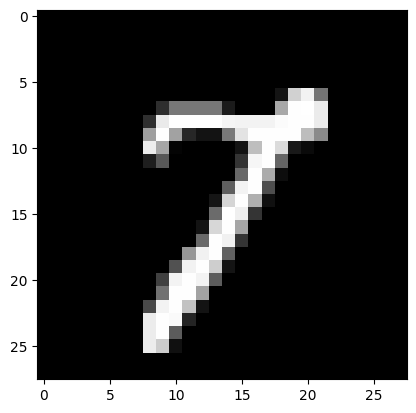

Prediction: [5]
Label: 3


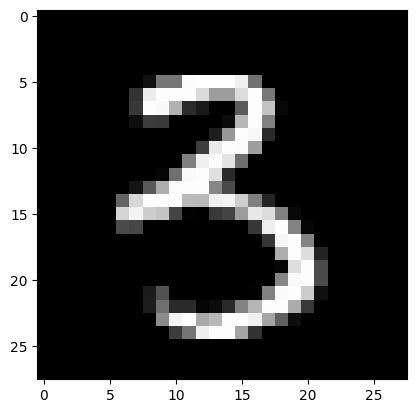

Prediction: [9]
Label: 9


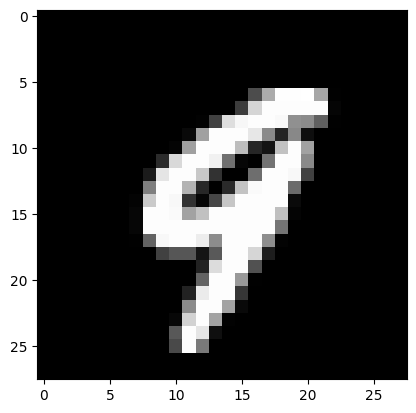

Prediction: [4]
Label: 4


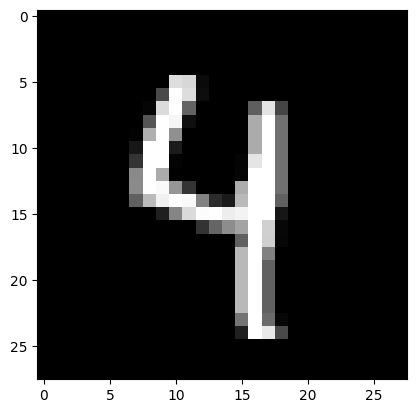

Prediction: [8]
Label: 8


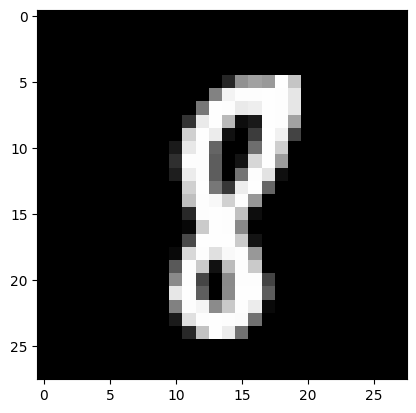

Prediction: [5]
Label: 5


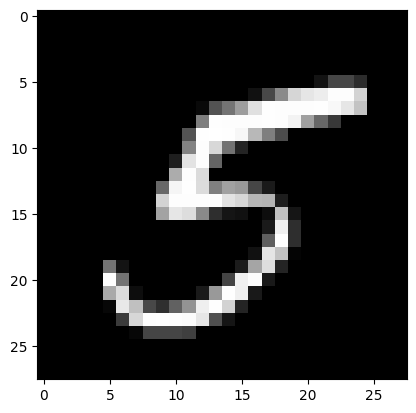

Prediction: [4]
Label: 4


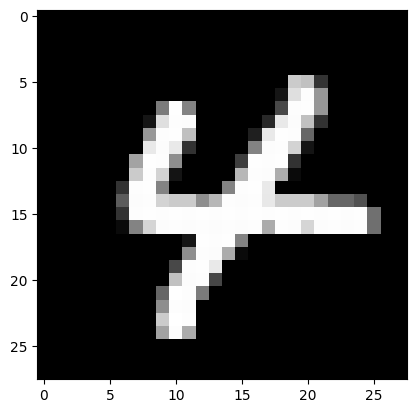

Prediction: [7]
Label: 7


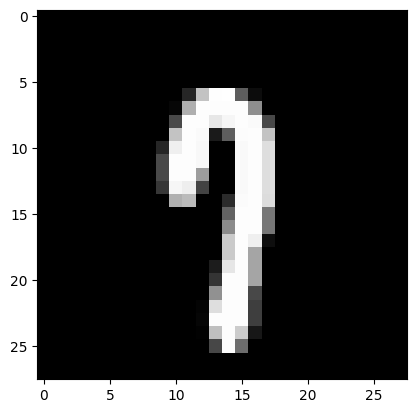

Prediction: [3]
Label: 3


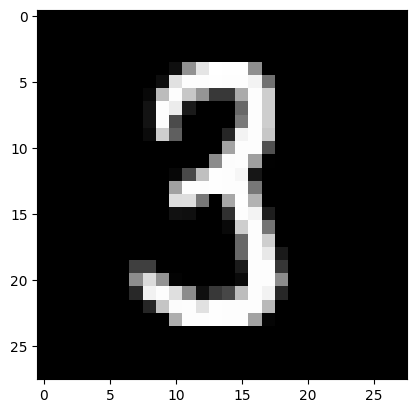

Prediction: [9]
Label: 9


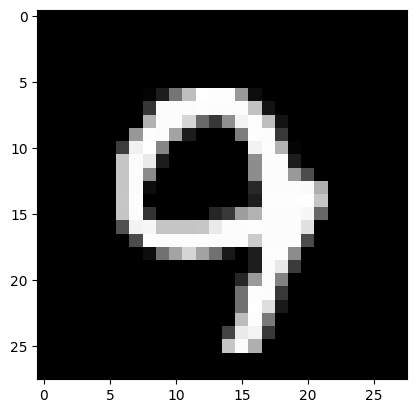

Prediction: [4]
Label: 4


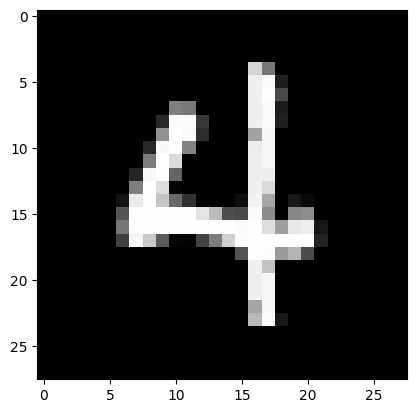

Prediction: [9]
Label: 9


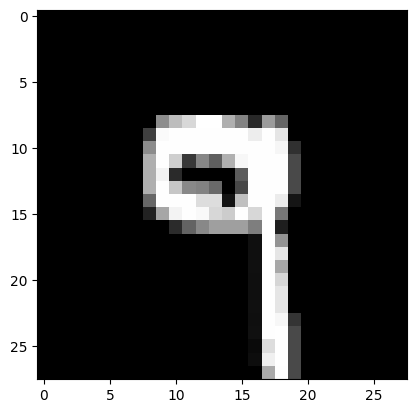

Prediction: [4]
Label: 4


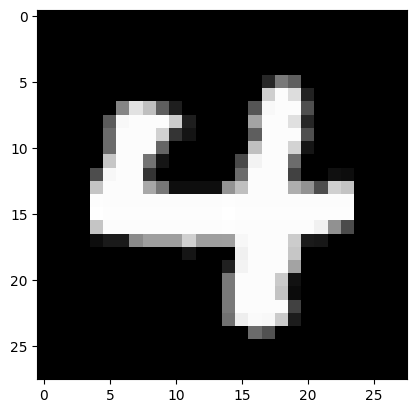

Prediction: [9]
Label: 9


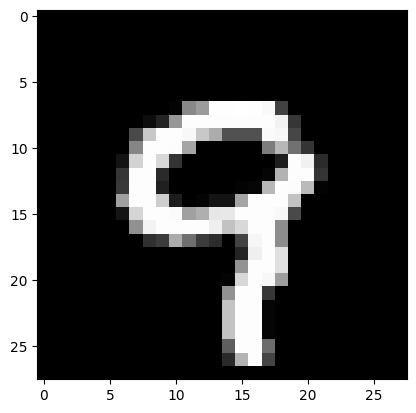

Prediction: [4]
Label: 4


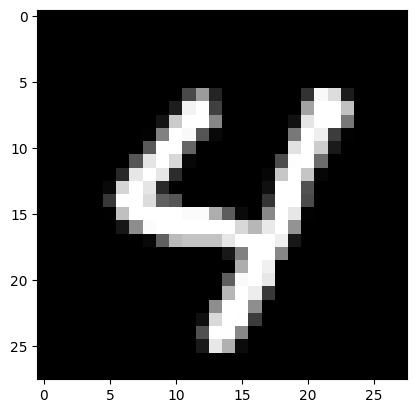

Prediction: [6]
Label: 0


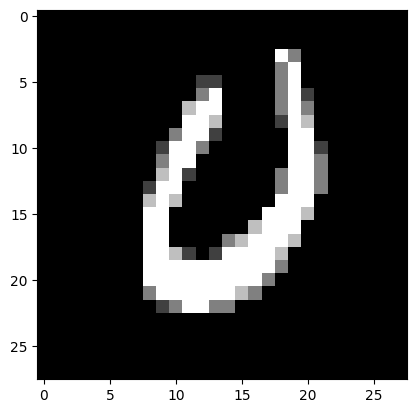

Prediction: [5]
Label: 5


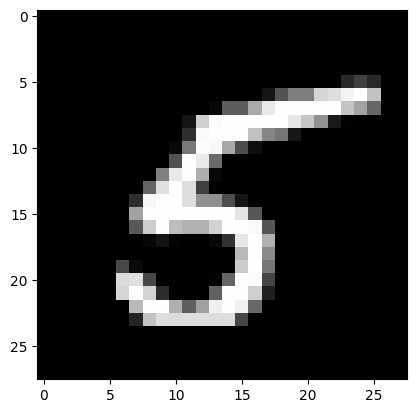

Prediction: [5]
Label: 5


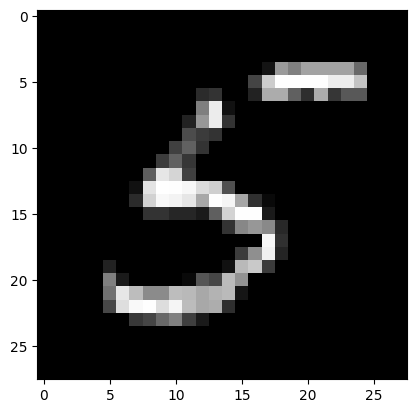

Prediction: [4]
Label: 4


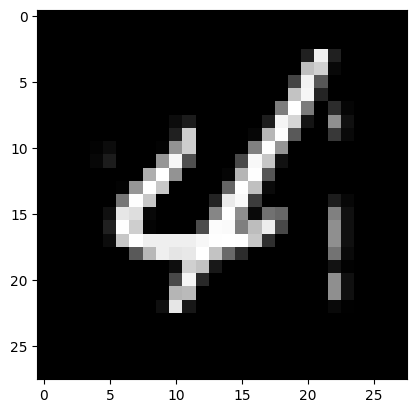

Prediction: [2]
Label: 2


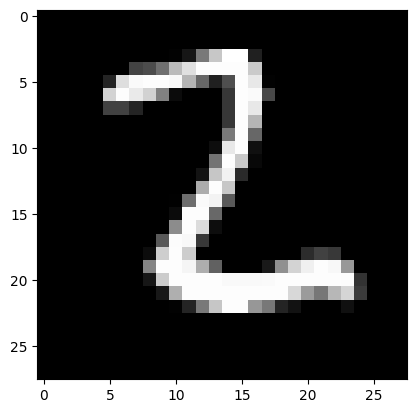

Prediction: [6]
Label: 6


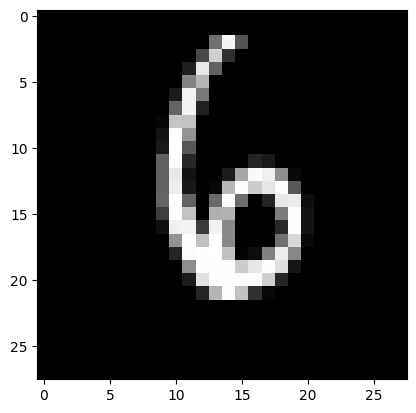

Prediction: [1]
Label: 1


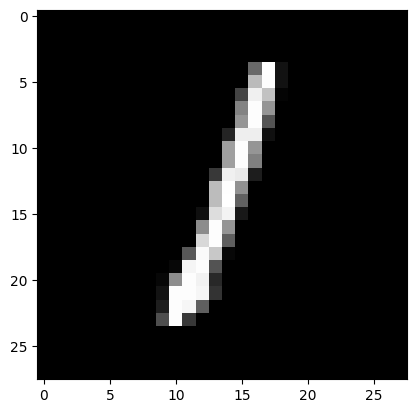

Prediction: [2]
Label: 2


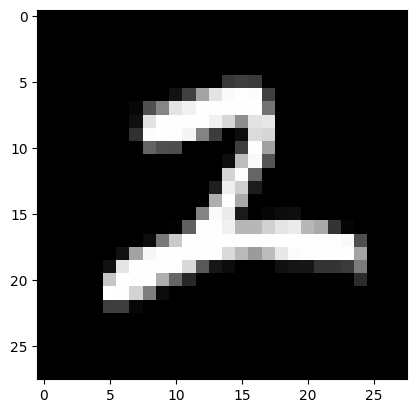

Prediction: [8]
Label: 8


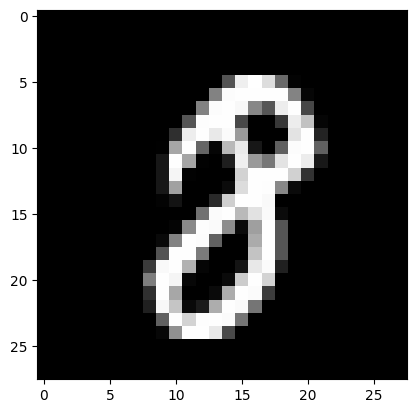

Prediction: [7]
Label: 7


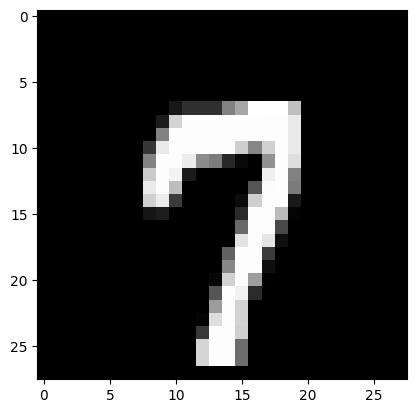

Prediction: [2]
Label: 2


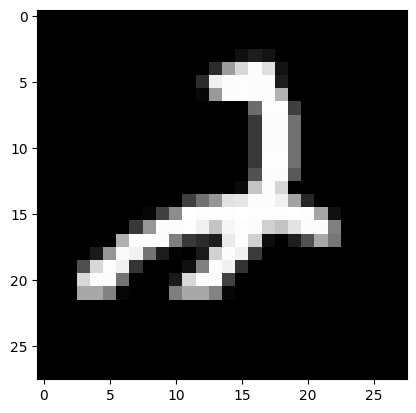

Prediction: [8]
Label: 8


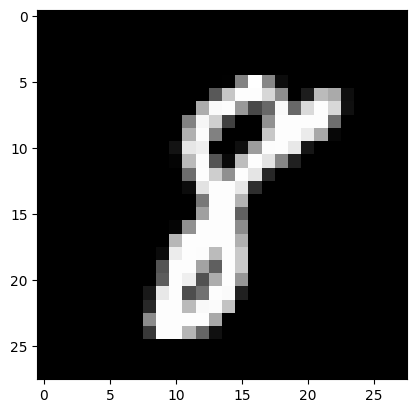

Prediction: [1]
Label: 1


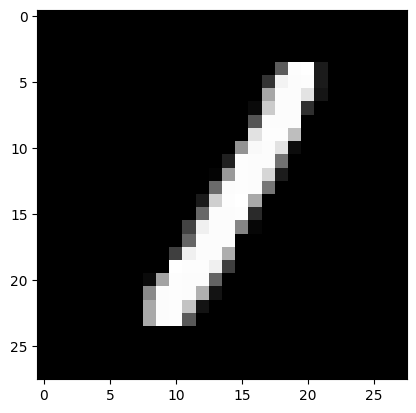

Prediction: [9]
Label: 9


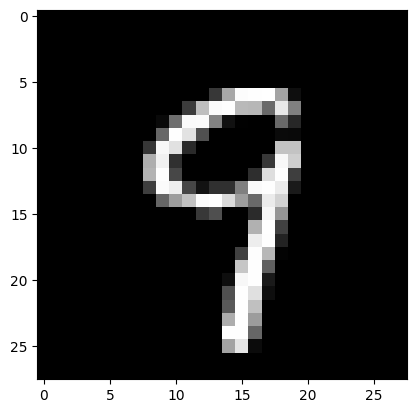

Prediction: [2]
Label: 3


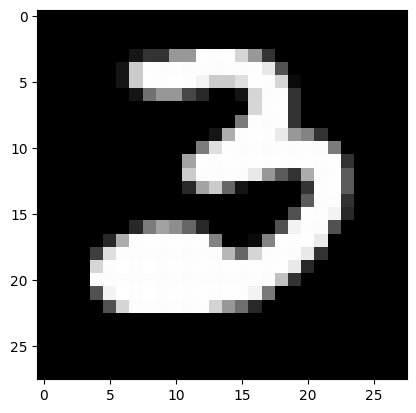

Prediction: [8]
Label: 1


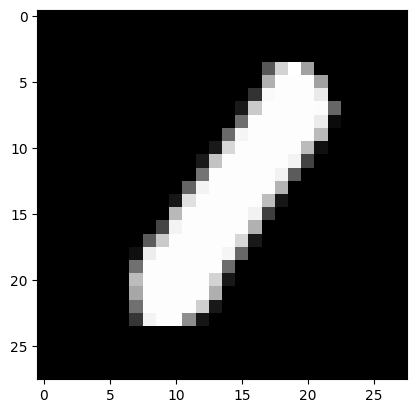

Prediction: [4]
Label: 4


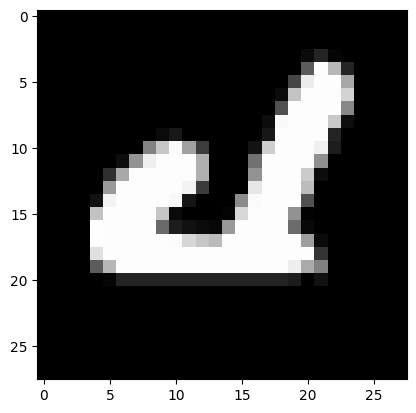

Prediction: [1]
Label: 1


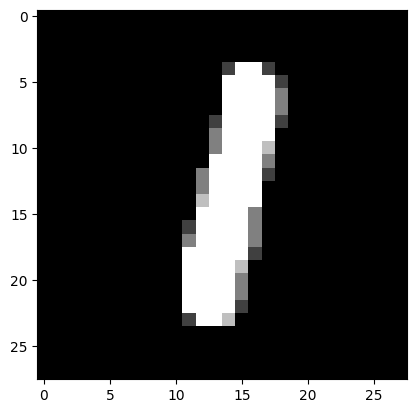

Prediction: [6]
Label: 6


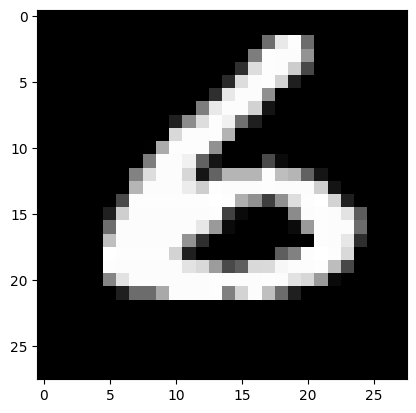

Prediction: [8]
Label: 8


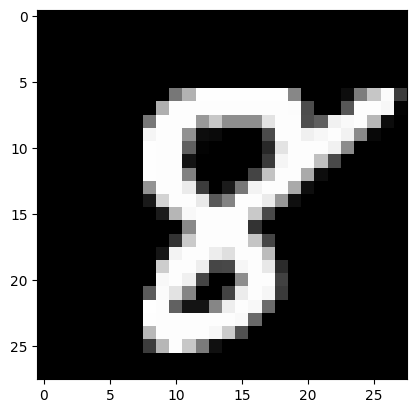

Prediction: [4]
Label: 4


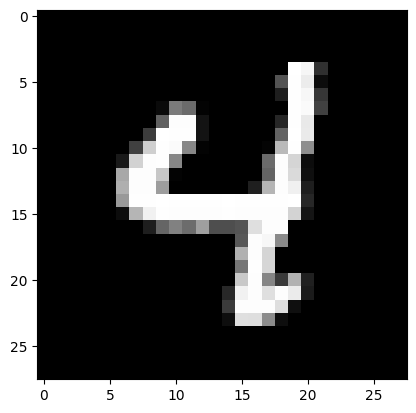

Prediction: [4]
Label: 4


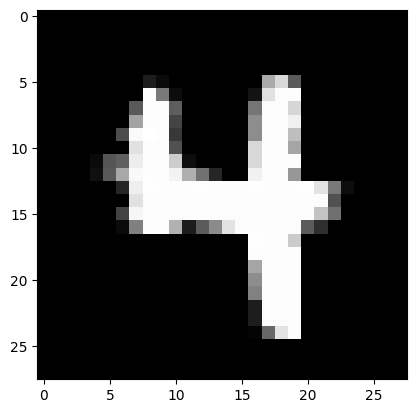

Prediction: [1]
Label: 1


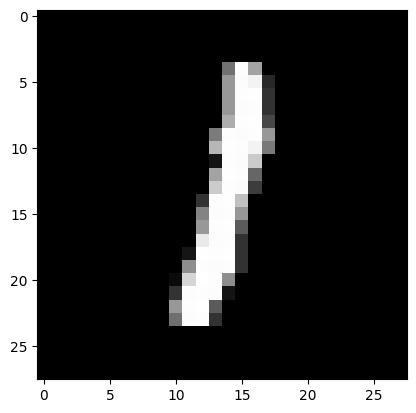

Prediction: [9]
Label: 9


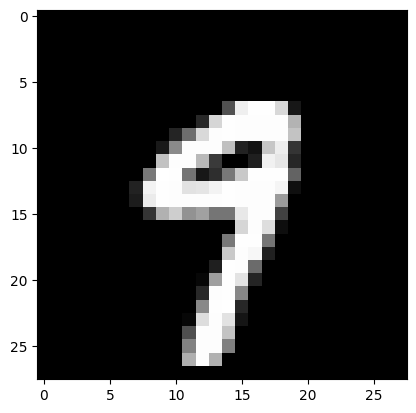

Prediction: [2]
Label: 2


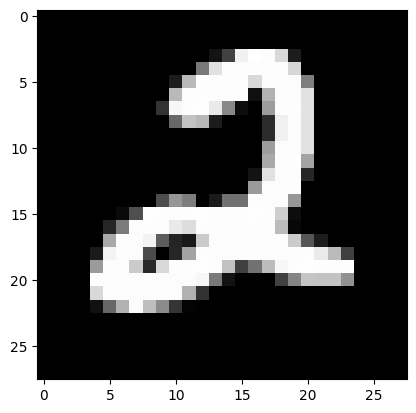

Prediction: [9]
Label: 9


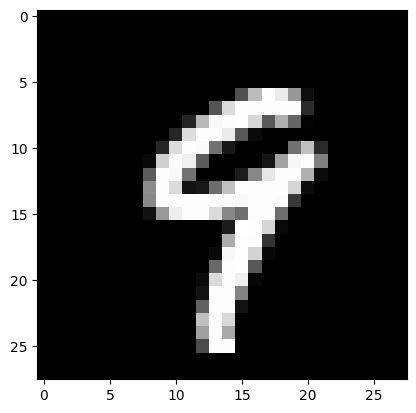

Prediction: [7]
Label: 7


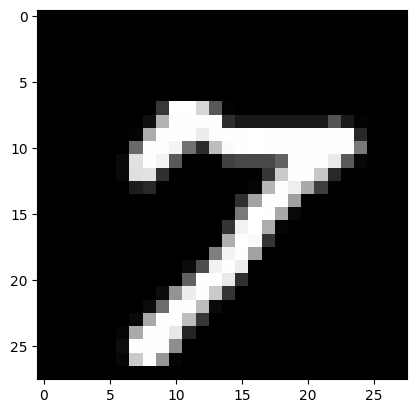

Prediction: [3]
Label: 3


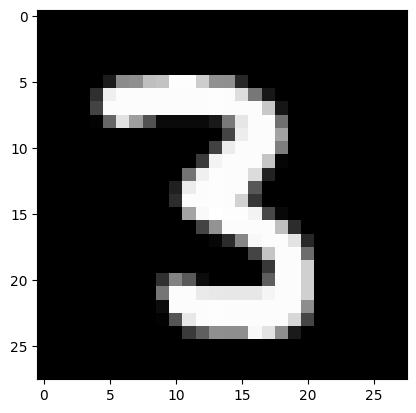

Prediction: [1]
Label: 1


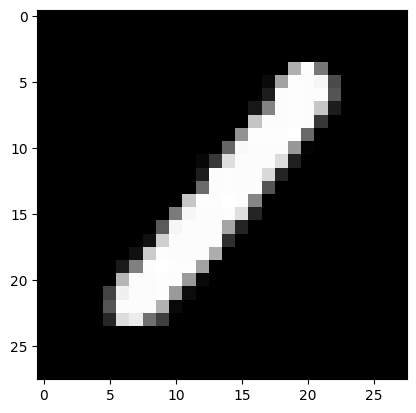

Prediction: [7]
Label: 7


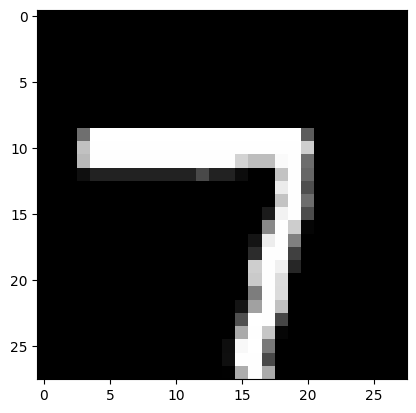

Prediction: [5]
Label: 5


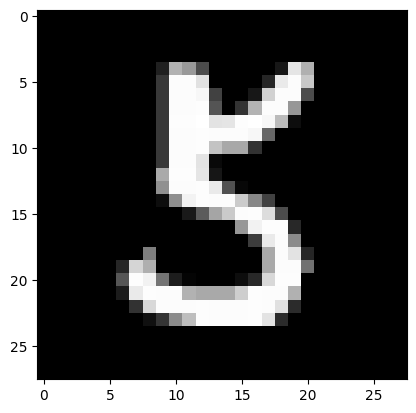

Prediction: [2]
Label: 2


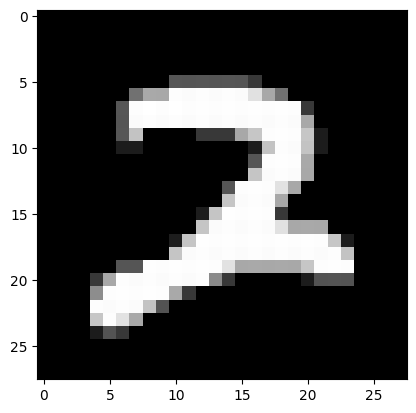

Prediction: [5]
Label: 5


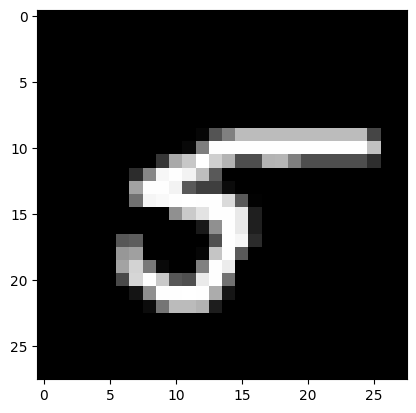

Prediction: [6]
Label: 2


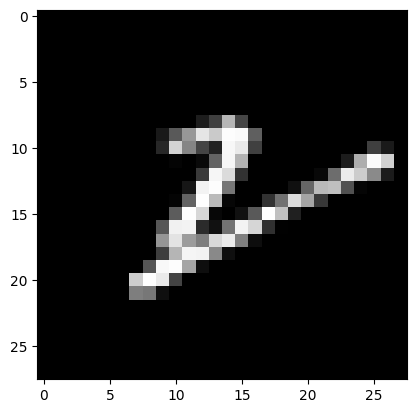

Prediction: [0]
Label: 0


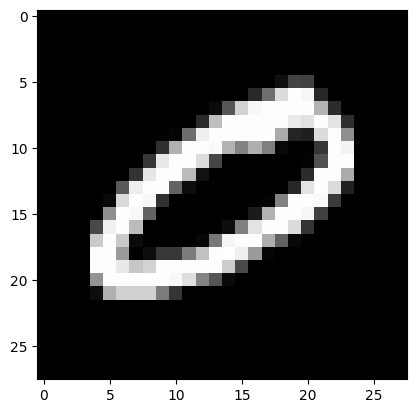

Prediction: [8]
Label: 8


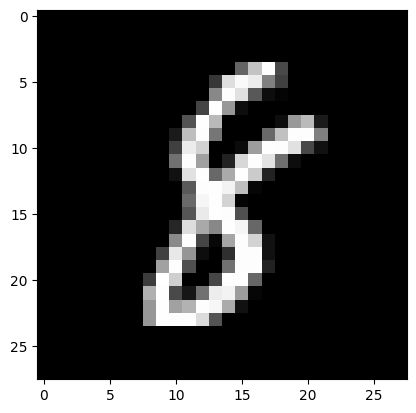

In [13]:
for i in range(0,10000,100):
    test_prediction(i,W1,b1,W2,b2)